In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
data = pd.read_csv('ETH2019-2024.csv')
close_prices = data['Close']

In [4]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 6:4
train_size = int(len(close_prices) * 0.6)
train, test = close_prices[:train_size], close_prices[train_size:]

In [5]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [6]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [7]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [8]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 803.5223322321806
MAPE: 46.33394407101701
MSE: 645648.1383958427


RMSE là chỉ số đánh giá độ lệch chuẩn của sai số dự báo. Giá trị này có thể được coi là tương đối cao.

MAPE là tỷ lệ sai số trung bình tuyệt đối và được biểu diễn dưới dạng phần trăm. Mô hình dự báo có sai số trung bình là khoảng 46.33% so với giá trị thực. Đây là một mức độ sai số lớn, cho thấy mô hình không đưa ra dự báo chính xác và có thể không phù hợp với dữ liệu ETH.

MSE là trung bình bình phương sai số. Giá trị MSE khoảng 645648.14 cũng là một con số khá lớn, cho thấy mô hình có nhiều sai số lớn và không ổn định trong dự báo.

### Dự báo

#### Dự báo 30 ngày

In [9]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    2565.800375
1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
1820    2498.647483
1821    2561.160751
1822    2496.716931
1823    2501.279714
1824    2509.466334
1825    2485.422356
1826    2528.947604
1827    2508.581613
1828    2528.259604
1829    2508.758479
1830    2501.957457
1831    2531.854850
1832    2532.869942
1833    2536.418337
1834    2520.846751
1835    2477.461612
1836    2469.088212
1837    2418.027290
1838    2464.871790
1839    2420.960674
1840    2400.960364
1841    2403.935533
1842    2409.754996
1843    2400.339048
1844    2425.765923
1845    2426.969925
dtype: float64


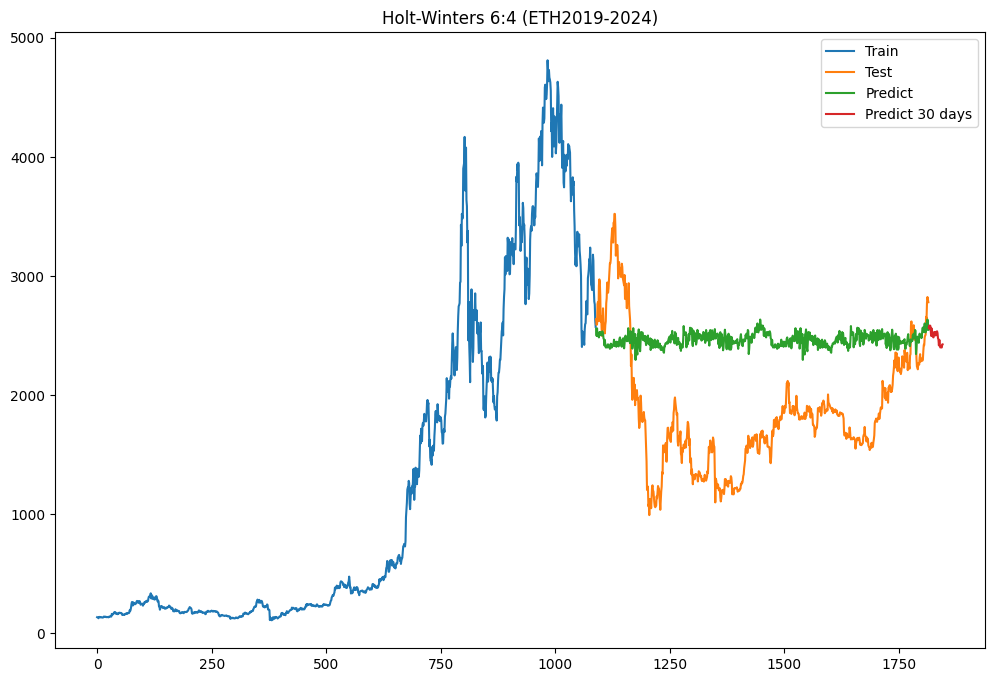

In [10]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [11]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    2565.800375
1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
           ...     
1871    2485.455956
1872    2457.235870
1873    2435.645688
1874    2413.846471
1875    2407.101526
Length: 61, dtype: float64


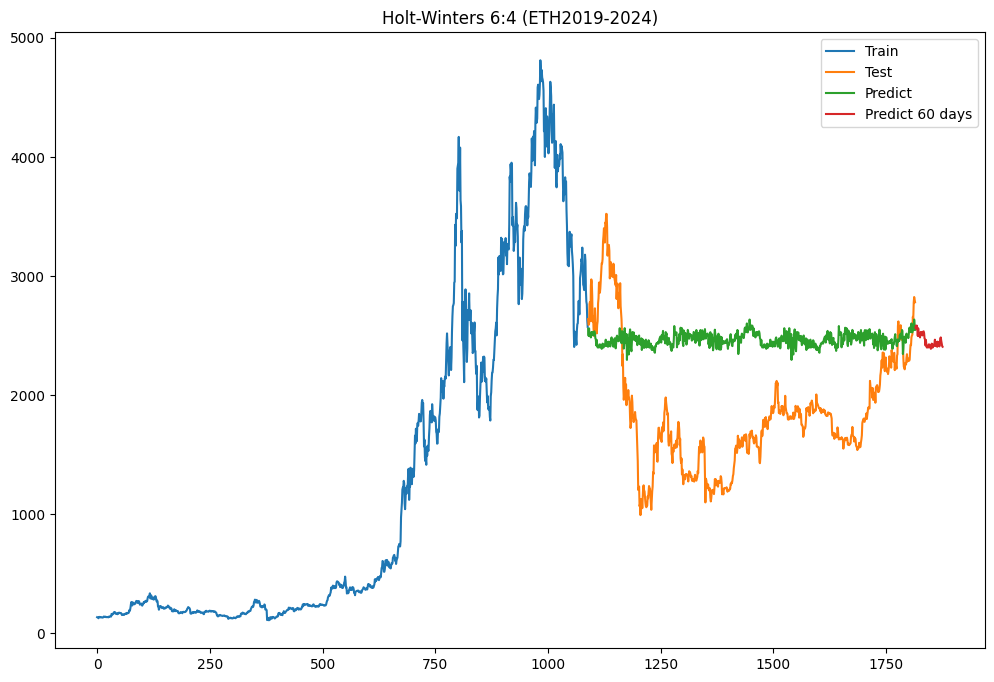

In [12]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [13]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    2565.800375
1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
           ...     
1901    2443.317582
1902    2467.622496
1903    2443.261587
1904    2514.468204
1905    2296.696522
Length: 91, dtype: float64


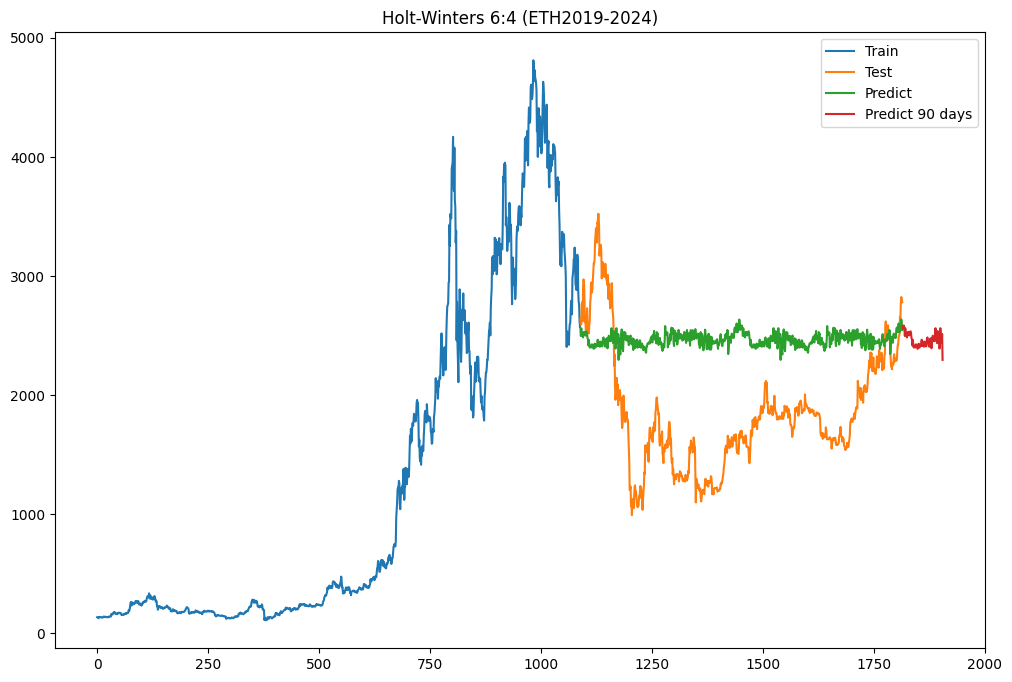

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

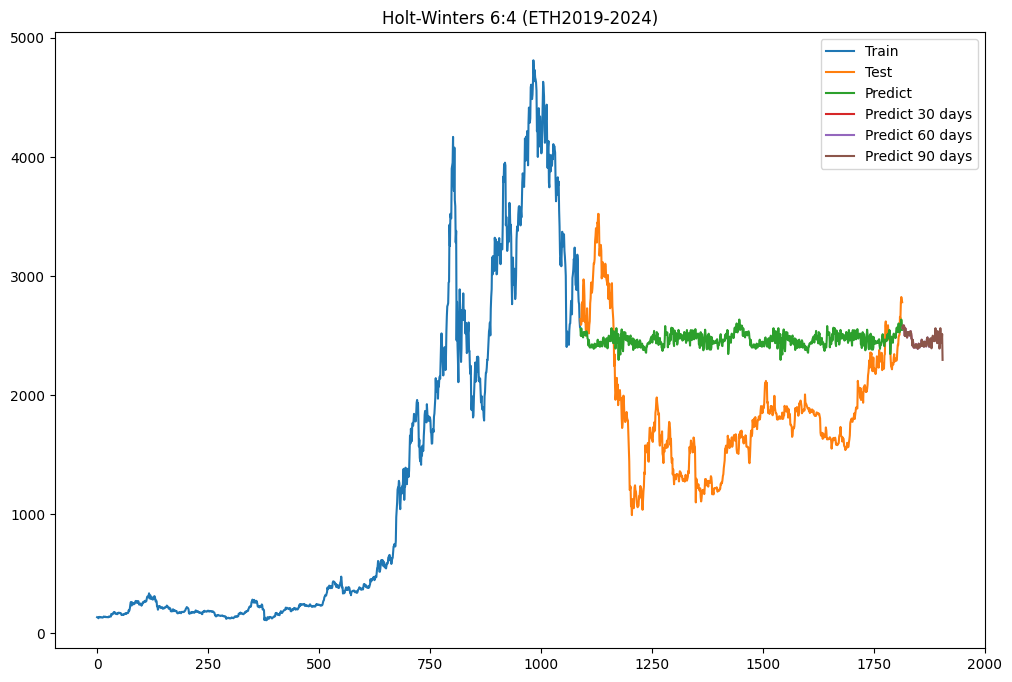

In [15]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()